# EDA

## Basic Info: data check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   listing_id         25000 non-null  int64  
 1   title              25000 non-null  object 
 2   make               23684 non-null  object 
 3   model              25000 non-null  object 
 4   description        24320 non-null  object 
 5   manufactured       24993 non-null  float64
 6   original_reg_date  255 non-null    object 
 7   reg_date           25000 non-null  object 
 8   type_of_vehicle    25000 non-null  object 
 9   category           25000 non-null  object 
 10  transmission       25000 non-null  object 
 11  curb_weight        24693 non-null  float64
 12  power              22360 non-null  float64
 13  fuel_type          5879 non-null   object 
 14  engine_cap         24404 non-null  float64
 15  no_of_owners       24982 non-null  float64
 16  depreciation       244

In [2]:
missing_values = data.isnull().sum()
missing_percentages = (missing_values / len(data)) * 100
missing_info = pd.DataFrame({'Number of missing values': missing_values, 'Percentage of missing values (%)': missing_percentages})
print(missing_info)

                   Number of missing values  Percentage of missing values (%)
listing_id                                0                             0.000
title                                     0                             0.000
make                                   1316                             5.264
model                                     0                             0.000
description                             680                             2.720
manufactured                              7                             0.028
original_reg_date                     24745                            98.980
reg_date                                  0                             0.000
type_of_vehicle                           0                             0.000
category                                  0                             0.000
transmission                              0                             0.000
curb_weight                             307                     

> Observation 1

- Some features have more than 90% empty entries, thus, they might be useless for our tasks. We will ignore them in the following processing.

In [3]:
data.duplicated().sum()

0

In [4]:
data.dtypes

listing_id             int64
title                 object
make                  object
model                 object
description           object
manufactured         float64
original_reg_date     object
reg_date              object
type_of_vehicle       object
category              object
transmission          object
curb_weight          float64
power                float64
fuel_type             object
engine_cap           float64
no_of_owners         float64
depreciation         float64
coe                    int64
road_tax             float64
dereg_value          float64
mileage              float64
omv                  float64
arf                  float64
opc_scheme            object
lifespan              object
eco_category          object
features              object
accessories           object
indicative_price     float64
price                float64
dtype: object

In [5]:
data.describe()

,listing_id,manufactured,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,indicative_price,price
count,2.500000e+04,24993.000000,24693.000000,22360.000000,24404.000000,24982.000000,24493.000000,25000.000000,22368.000000,2.478000e+04,1.969600e+04,24936.000000,2.482600e+04,0.0,2.500000e+04
mean,1.299377e+06,2015.645181,1580.784109,140.908095,2059.310441,2.289328,20466.481444,48935.722720,1462.160899,4.603714e+04,8.593014e+04,41464.935274,4.472783e+04,NaN,1.151486e+05
std,3.507003e+04,5.723515,837.961160,81.675265,1073.197922,1.489925,19768.630796,21584.778467,1377.161884,6.135528e+04,5.162519e+04,48374.987804,7.911383e+04,NaN,1.555725e+05
min,3.652410e+05,1939.000000,435.000000,0.000000,0.000000,1.000000,1770.000000,2605.000000,50.000000,1.100000e+01,1.000000e+00,426.000000,2.300000e+01,NaN,7.000000e+02
25%,1.291592e+06,2014.000000,1295.000000,90.000000,1496.000000,1.000000,13430.000000,35001.000000,684.000000,1.814300e+04,5.032475e+04,19990.000000,1.364600e+04,NaN,4.914100e+04
50%,1.308018e+06,2017.000000,1480.000000,111.000000,1797.000000,2.000000,15850.000000,45289.000000,1107.000000,2.896800e+04,8.400000e+04,28480.000000,2.524100e+04,NaN,7.888800e+04
75%,1.321186e+06,2019.000000,1700.000000,155.000000,2151.000000,3.000000,20780.000000,55889.000000,1630.000000,5.173025e+04,1.160000e+05,42373.250000,4.565275e+04,NaN,1.258000e+05
max,1.332660e+06,2024.000000,25620.000000,735.000000,15681.000000,6.000000,607730.000000,158004.000000,12375.000000,1.114652e+06,1.290000e+06,811764.000000,1.491920e+06,NaN,2.899999e+06


In [6]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(numeric_cols)
print(categorical_cols)

['listing_id', 'manufactured', 'curb_weight', 'power', 'engine_cap', 'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value', 'mileage', 'omv', 'arf', 'indicative_price', 'price']
['title', 'make', 'model', 'description', 'original_reg_date', 'reg_date', 'type_of_vehicle', 'category', 'transmission', 'fuel_type', 'opc_scheme', 'lifespan', 'eco_category', 'features', 'accessories']


In [7]:
del_cols = ['listing_id', 'original_reg_date','opc_scheme', 'lifespan','eco_category', 'indicative_price']
text_cols = ['title', 'description', 'features', 'accessories'] # may need further processing
date_cols = ['reg_date'] # need to transform
numeric_cols = ['manufactured', 'curb_weight', 'power', 'engine_cap', 'depreciation', 'coe', 'road_tax', 'dereg_value', 'mileage', 'omv', 'arf', 'price']
categorical_cols = ['make', 'model', 'type_of_vehicle', 'category', 'transmission', 'fuel_type', 'no_of_owners']

> Observation 2

- We treat `no_of_owners` as categorical feature.
- We separate `del_cols` , and `text_cols` which may need further processing.

In [8]:
print(f"Total number of features: {len(del_cols + text_cols + date_cols + numeric_cols + categorical_cols)}")

Total number of features: 30


In [9]:
# Remove unnecessary columns from the dataset
data = data.drop(columns=del_cols)

## Numeric Features

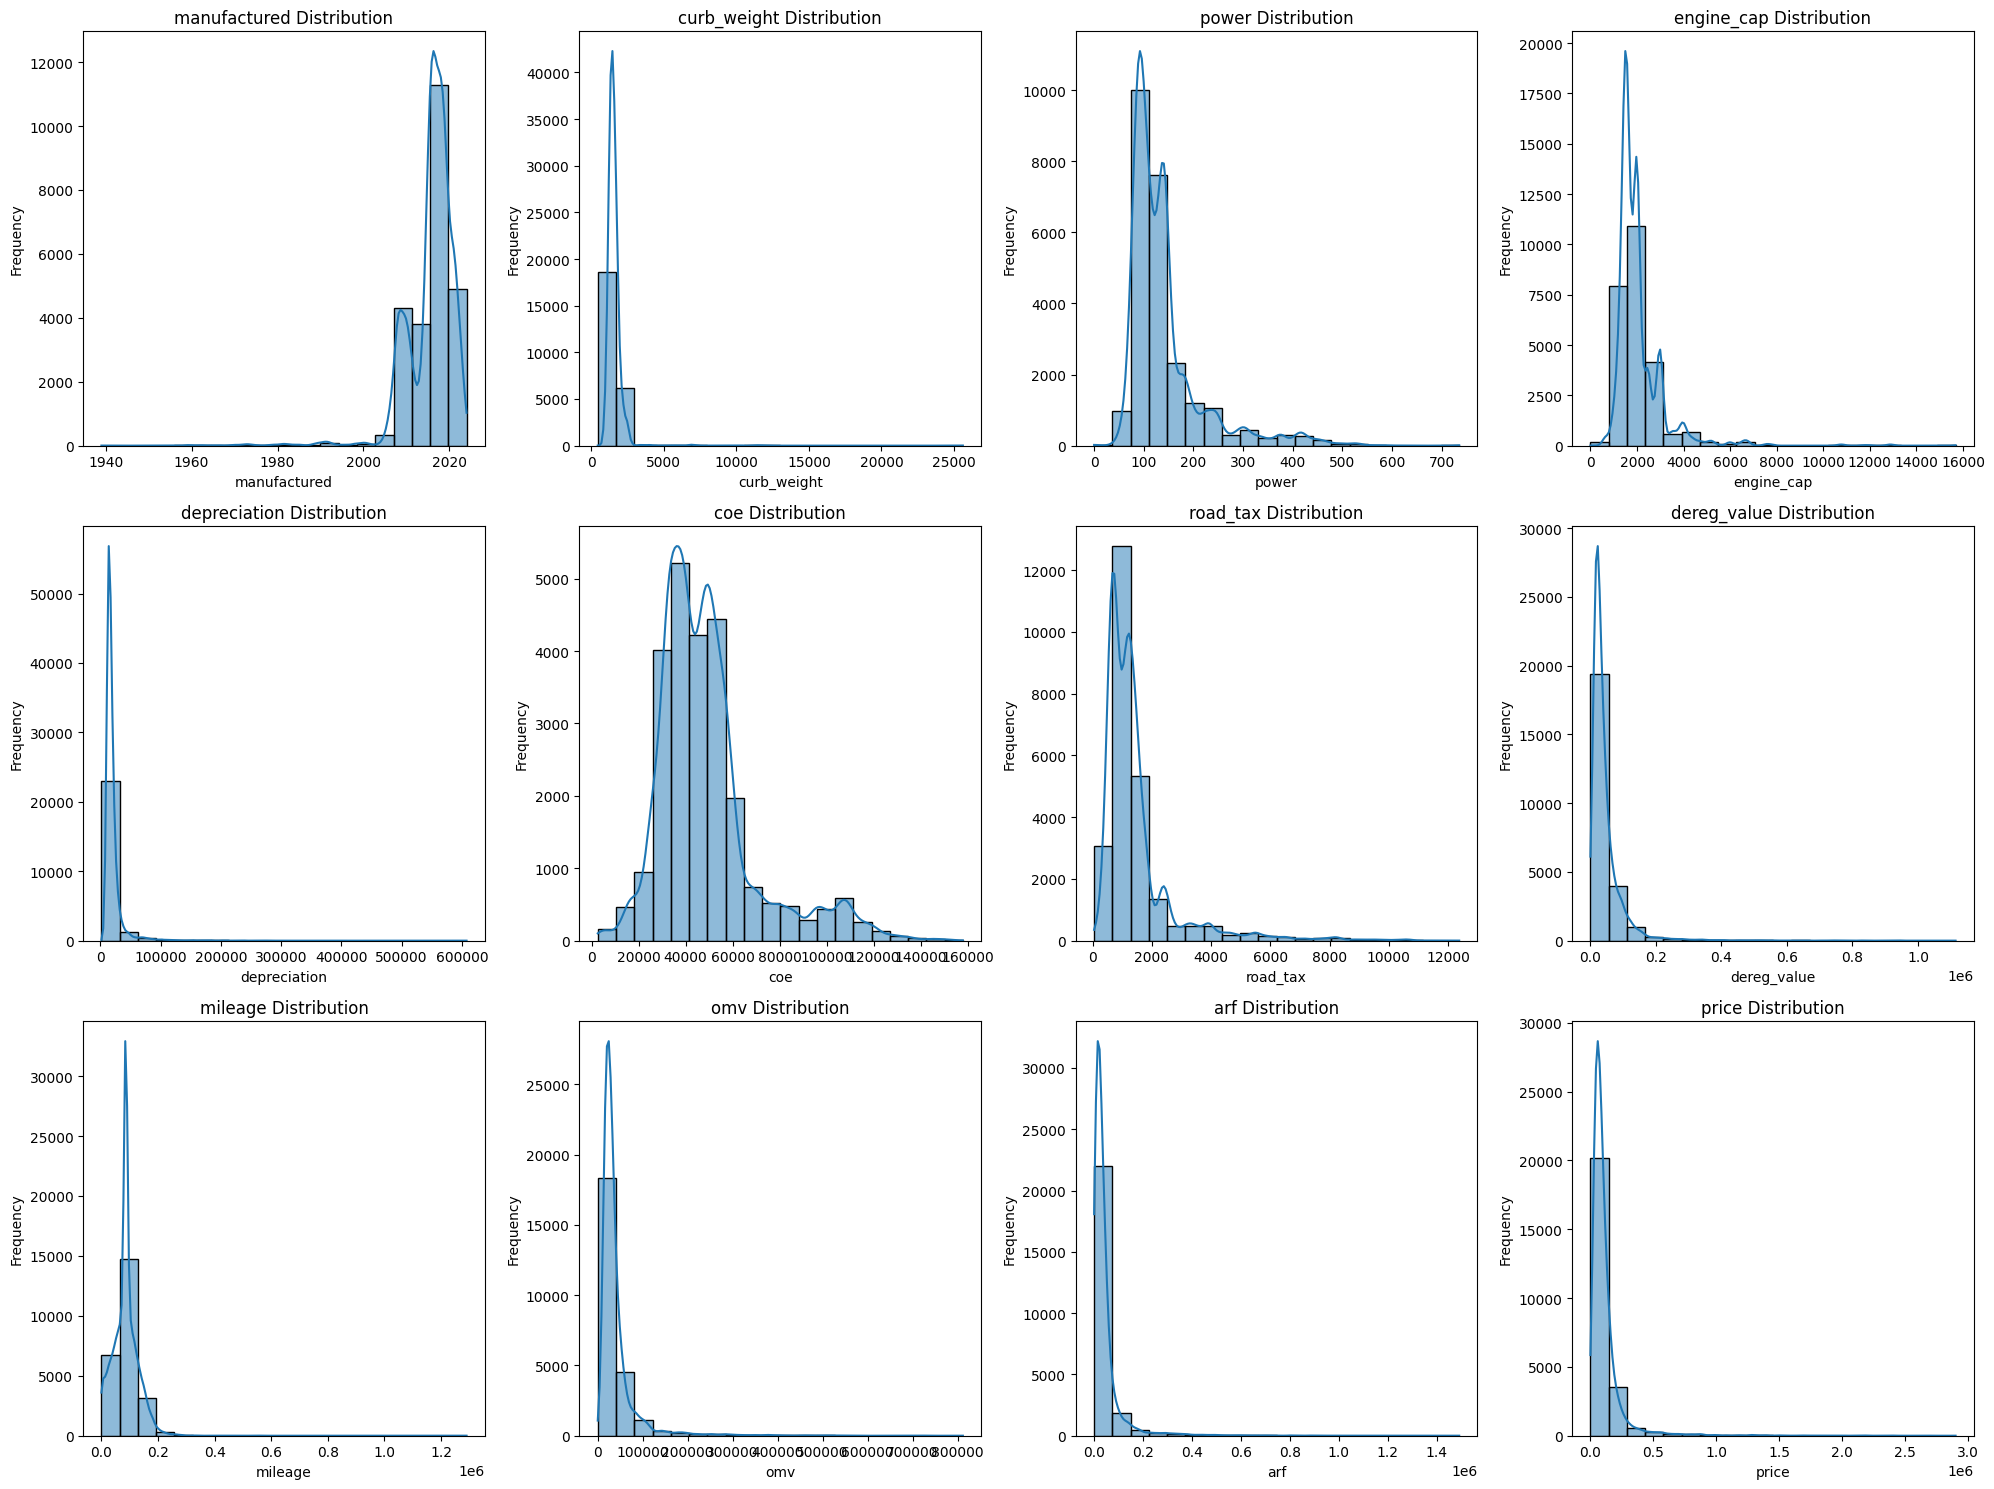

In [10]:
# Set up the figure for all numeric features
plt.figure(figsize=(20, 15))

# Loop through each numeric column
for i, col in enumerate(numeric_cols, 1):
    # Create a subplot for each feature
    data[col] = data[col].fillna(data[col].mean())
    plt.subplot(3, 4, i)
    
    # Plot histogram with KDE
    sns.histplot(data[col].dropna(), bins=20, kde=True)
    
    # Set title and labels
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

> Observation 3
- Many features shows an obvious right-skewed distribution, including some extreme long-tailed distribution.
- Some suggestions for **transformation**:
  - Log Transformation: `price`, `omv`, `arf`, `depreciation`, `dereg_value`
  - Root Transformation: `power`, `engine_cap`, `road_tax`, `mileage`
  - Apply **Standardization** to all numeric features

In [11]:
long_tail_features = ['omv', 'arf', 'depreciation', 'dereg_value']
for feature in long_tail_features:
    data[f'{feature}_log'] = np.log1p(data[feature])
    
root_transform_features = ['power', 'engine_cap', 'road_tax', 'mileage']
for feature in root_transform_features:
    data[f'{feature}_sqrt'] = np.sqrt(data[feature])

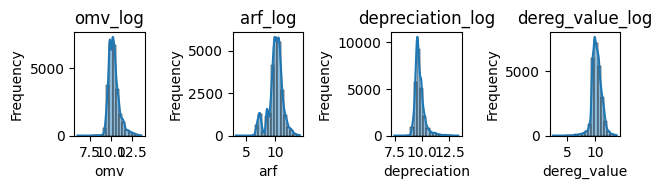

In [12]:
# Loop through each numeric column
for i, col in enumerate(long_tail_features, 1):
    # Create a subplot for each feature
    plt.subplot(3, 4, i)
    
    # Plot histogram with KDE
    sns.histplot(data[f'{col}_log'].dropna(), bins=20, kde=True)
    
    # Set title and labels
    plt.title(f'{col}_log')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

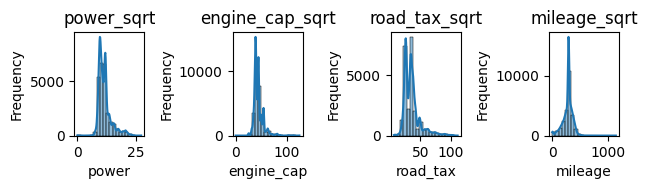

In [13]:
# Loop through each numeric column
for i, col in enumerate(root_transform_features, 1):
    # Create a subplot for each feature
    plt.subplot(3, 4, i)
    
    # Plot histogram with KDE
    sns.histplot(data[f'{col}_sqrt'].dropna(), bins=20, kde=True)
    
    # Set title and labels
    plt.title(f'{col}_sqrt')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Numeric feature heatmap')

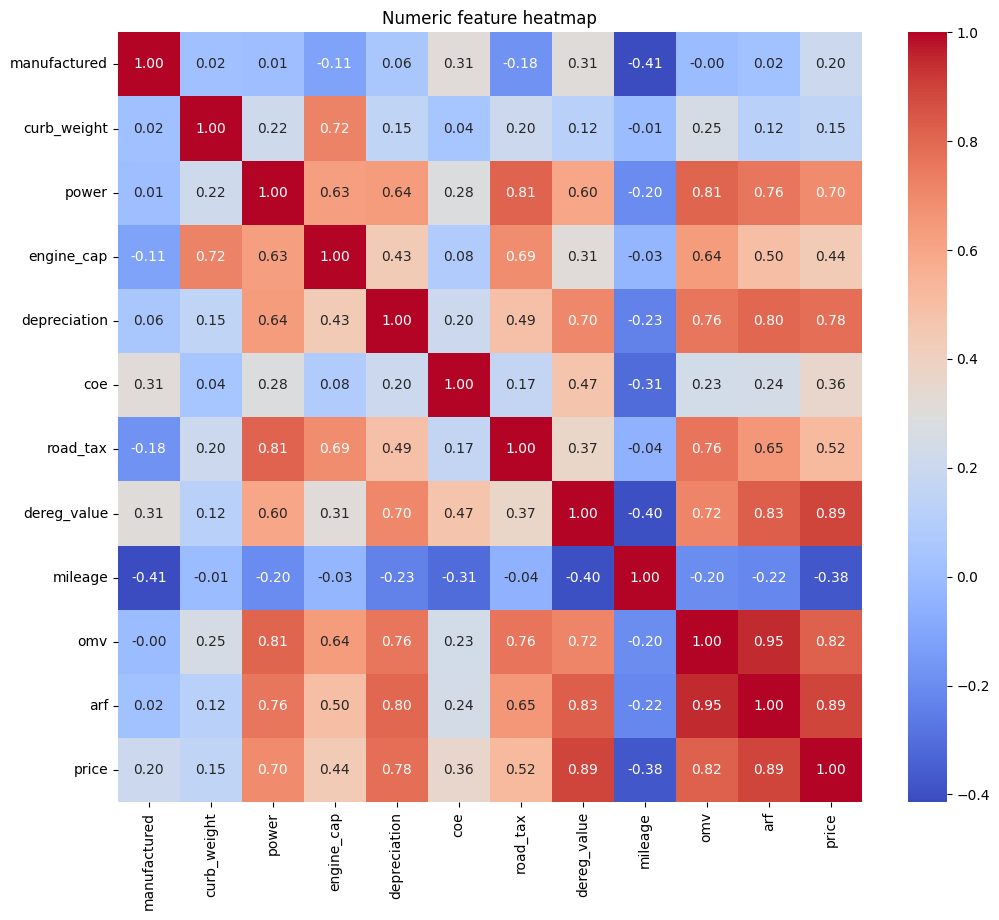

In [14]:
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numeric feature heatmap')

Text(0.5, 1.0, 'Numeric feature heatmap')

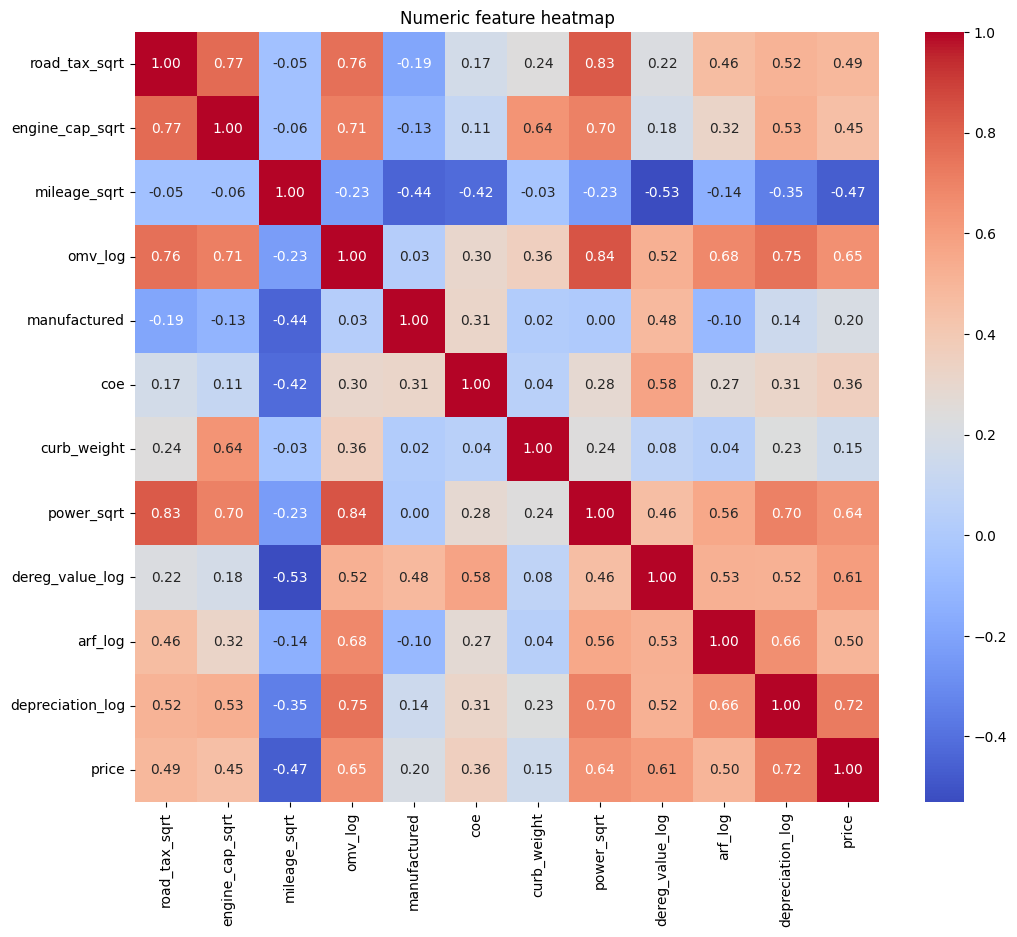

In [15]:
new_numeric_cols = set(numeric_cols)
for col in long_tail_features:
    new_numeric_cols.remove(col)
    new_numeric_cols.add(f'{col}_log')
    
for col in root_transform_features:
    new_numeric_cols.remove(col)
    new_numeric_cols.add(f'{col}_sqrt')
    
new_numeric_cols = list(new_numeric_cols)
    
corr_matrix = data[new_numeric_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numeric feature heatmap')

Text(0.5, 1.0, 'Numeric feature heatmap')

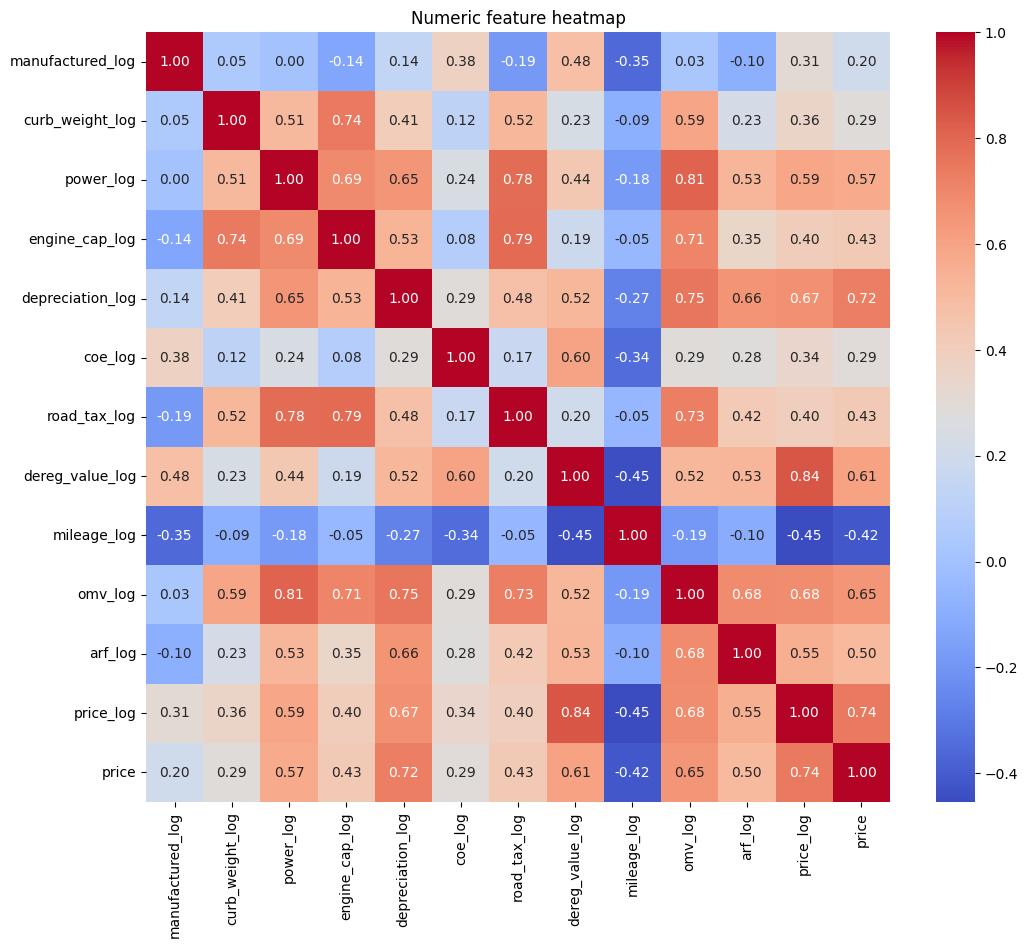

In [16]:
for feature in numeric_cols:
    data[f'{feature}_log'] = np.log1p(data[feature])

numeric_cols_logs = []
for col in numeric_cols:
    numeric_cols_logs.append(f'{col}_log')
numeric_cols_logs.append('price')

corr_matrix = data[numeric_cols_logs].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numeric feature heatmap')

Text(0.5, 1.0, 'Numeric feature heatmap')

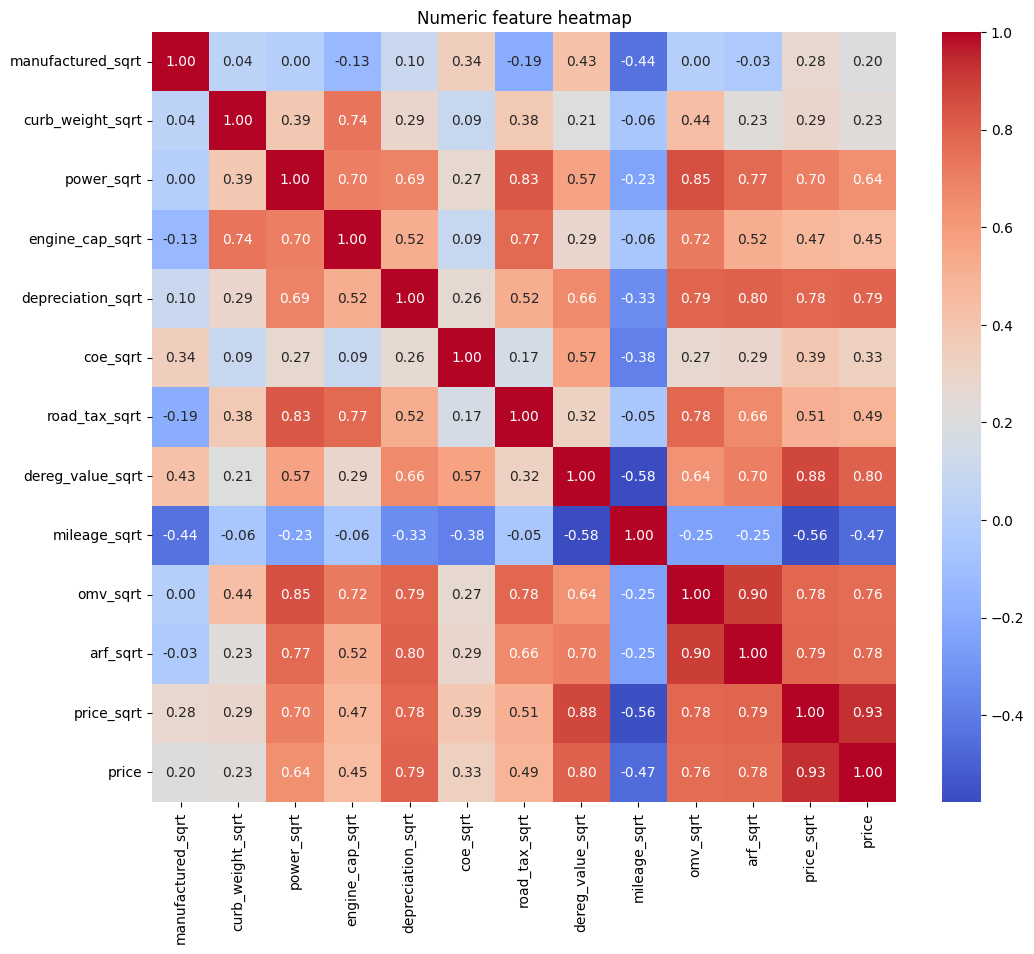

In [28]:
for feature in numeric_cols:
    data[f'{feature}_sqrt'] = np.sqrt(data[feature])

numeric_cols_sqrts = []
for col in numeric_cols:
    numeric_cols_sqrts.append(f'{col}_sqrt')
numeric_cols_sqrts.append('price')

corr_matrix = data[numeric_cols_sqrts].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numeric feature heatmap')

> Observation 4
- Suggestions for **feature engineering**:
  - Create `vehicle_age` from `manufactured`
  - Create `engine_performance_index`: high correlations among `power` and `engine_cap`, create a new feature to indicate the overall perfermance.
  - Create `power_to_weight_ratio` : moderate correlation between `power` and `curb_weight`
  - Create `annual_mileage`: `mileage` shows negative correlations with several features, and `annual_mileage` indicates the intensity of vehicle use.
  - Create `value_indicator`: strong correlations of `omv` and `arf` with `price` 
- **feature selection** may be needed later

In [18]:
import datetime

# Get current year for age calculation
current_year = datetime.datetime.now().year

# Feature Engineering
data['vehicle_age'] = current_year - data['manufactured']
data['engine_performance_index'] = data['power'] * data['engine_cap']
data['power_to_weight_ratio'] = data['power'] / data['curb_weight']
data['annual_mileage'] = data['mileage'] / data['vehicle_age']

# Optional: Composite value indicator (if needed)
data['value_indicator'] = (data['omv'] + data['arf']) / 2

# Ensure we don't divide by zero in annual_mileage calculation
data['annual_mileage'] = data['annual_mileage'].replace([np.inf, -np.inf], np.nan)
data['annual_mileage'] = data['annual_mileage'].fillna(data['annual_mileage'].mean())

## Target Analysis

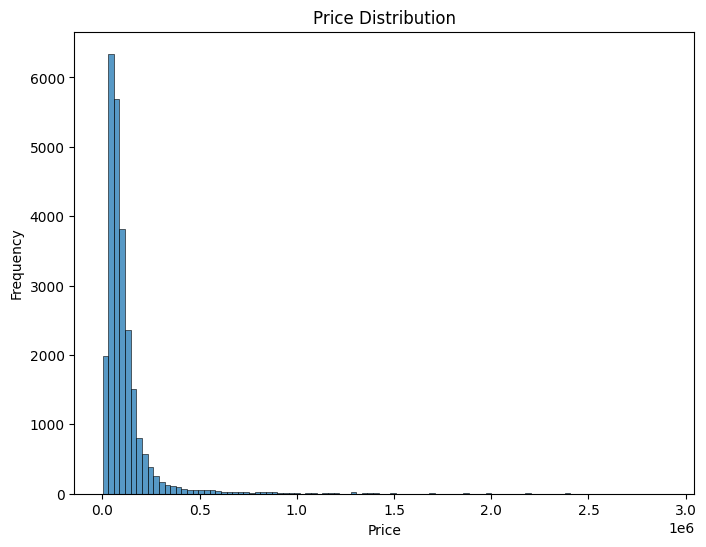

In [19]:
# Distribution of target variance
plt.figure(figsize=(8,6))
sns.histplot(data['price'].dropna(), bins=100)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Categorical Features

In [20]:
for col in categorical_cols:
    print(f"Number of categories in `{col}` is : {data[col].nunique()}")

Number of categories in `make` is : 95
Number of categories in `model` is : 799
Number of categories in `type_of_vehicle` is : 11
Number of categories in `category` is : 245
Number of categories in `transmission` is : 2
Number of categories in `fuel_type` is : 5
Number of categories in `no_of_owners` is : 6


In [21]:
print(data[categorical_cols].head(5))

            make    model  type_of_vehicle  \
0     land rover    range              suv   
1  mercedes-benz     c200     luxury sedan   
2          honda  odyssey              mpv   
3         toyota    altis  mid-sized sedan   
4          lexus       gs     luxury sedan   

                                   category transmission fuel_type  \
0                                  parf car         auto       NaN   
1                  parf car, premium ad car         auto       NaN   
2  coe car, premium ad car, low mileage car         auto       NaN   
3                   coe car, premium ad car         auto       NaN   
4                   coe car, premium ad car         auto       NaN   

   no_of_owners  
0           2.0  
1           2.0  
2           3.0  
3           3.0  
4           6.0  


> Observation 5
1. For low-cardinal categorical features (i.e. `transmission`, `fuel_type`, `no_of_owners`, `type_of_vehicle`): use target encoding or one-hot encoding.
2.  For "high-cardinal categorical features" (i.e. `make`, `model`)
    1.  use frequency encoding for `make`
    2.  use frequency encoding or top-k encoding for `model` after processing (see observation 6)
3.  For multi-valued categorical feature (`category`): use `MultiLabelBinarizer`

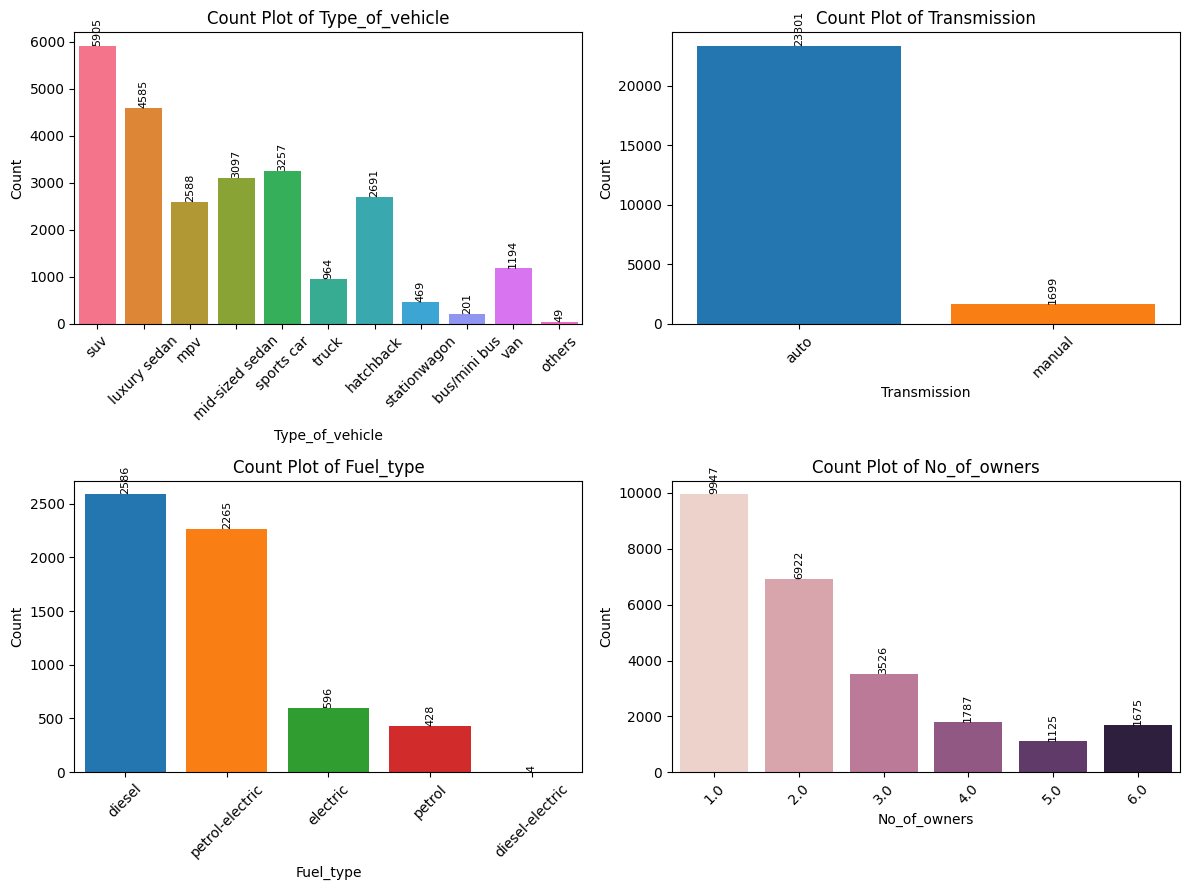

In [22]:
# Print low-cardinal categorical features
low_cardinal_categorical_col = [col for col in categorical_cols if data[col].nunique() < 15]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(low_cardinal_categorical_col):
    # Create countplot for each categorical column
    sns.countplot(x=column, data=data, hue=column, legend=False, ax=axes[i], saturation=0.95)
    
    # Add labels to each bar
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=8, rotation=90)
    
    # Set title and labels
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels to prevent overlap
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

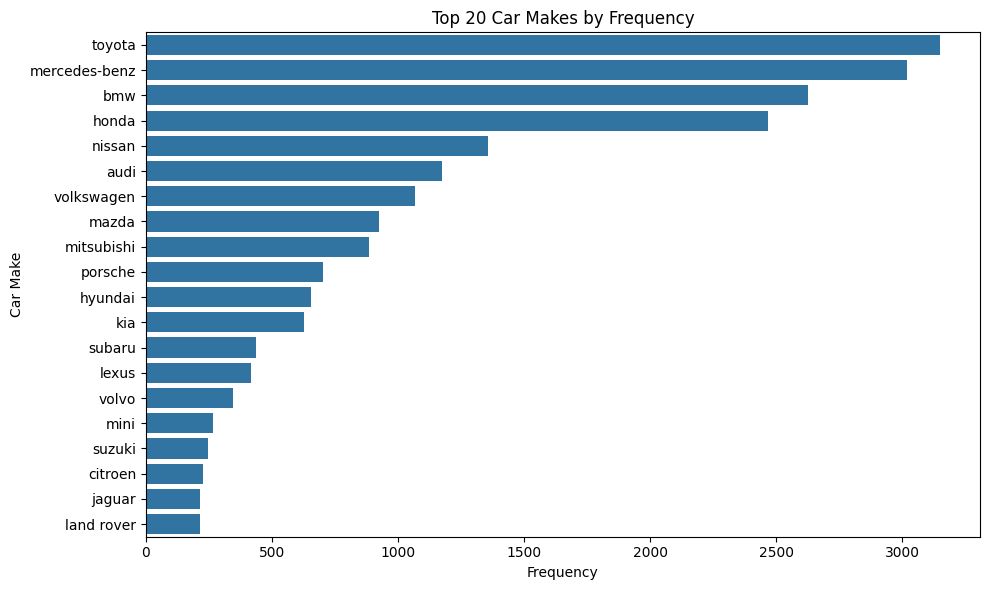

In [23]:
n = 20  # Number of top car makes to plot
top_car_makes = data['make'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_makes.values, y=top_car_makes.index)
plt.title(f'Top {n} Car Makes by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Make')
plt.tight_layout()
plt.show()

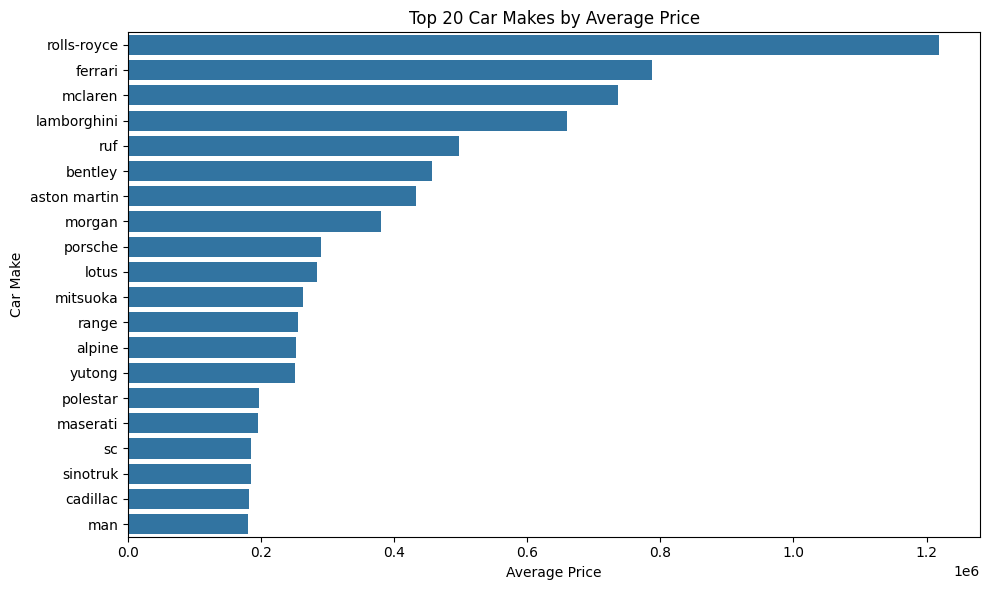

In [24]:
# Calculate average price for each car make
avg_prices_by_car_make = data.groupby('make')['price'].mean().sort_values(ascending=False)

# Plot top N car makes by average price
n = 20  # Number of top car makes to plot
top_car_makes = avg_prices_by_car_make.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_makes.values, y=top_car_makes.index)
plt.title(f'Top {n} Car Makes by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Make')
plt.tight_layout()
plt.show()

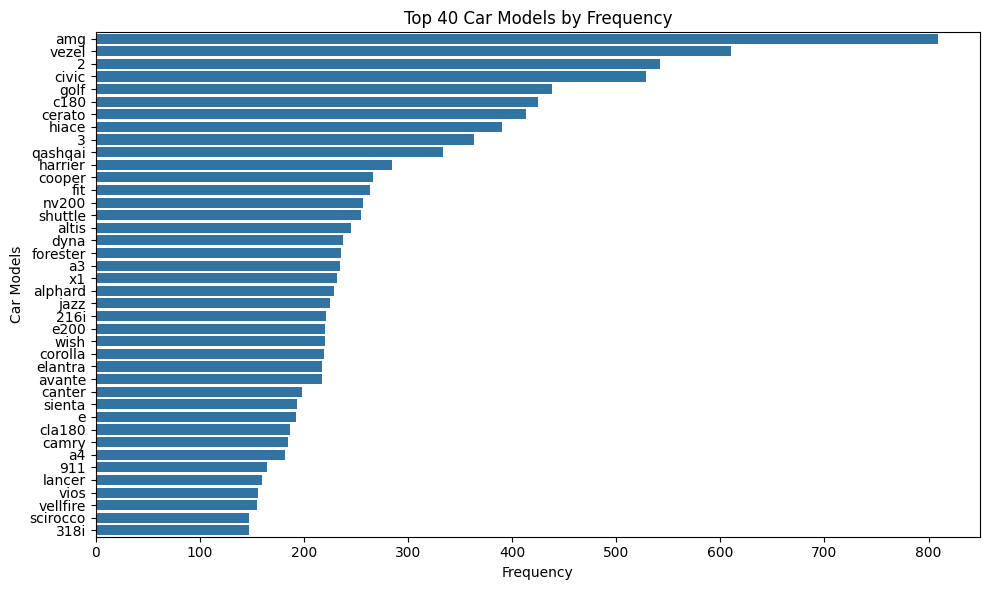

In [25]:
n = 40
top_car_models = data['model'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Models')
plt.tight_layout()
plt.show()

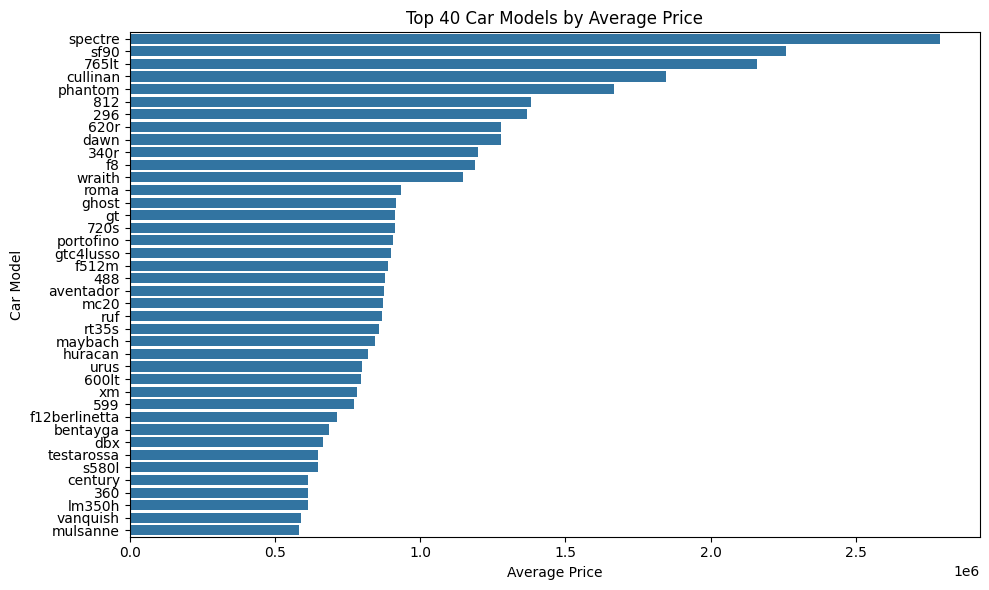

In [26]:
# Calculate average price for each car make
avg_prices_by_car_model = data.groupby('model')['price'].mean().sort_values(ascending=False)

n = 40 
top_car_models = avg_prices_by_car_model.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

> Observation 6
- The `model` feature contains lots of confusing representations (e.g. "e", "3", "2"), which requires further processing. (like joining `make` and `model` together?)

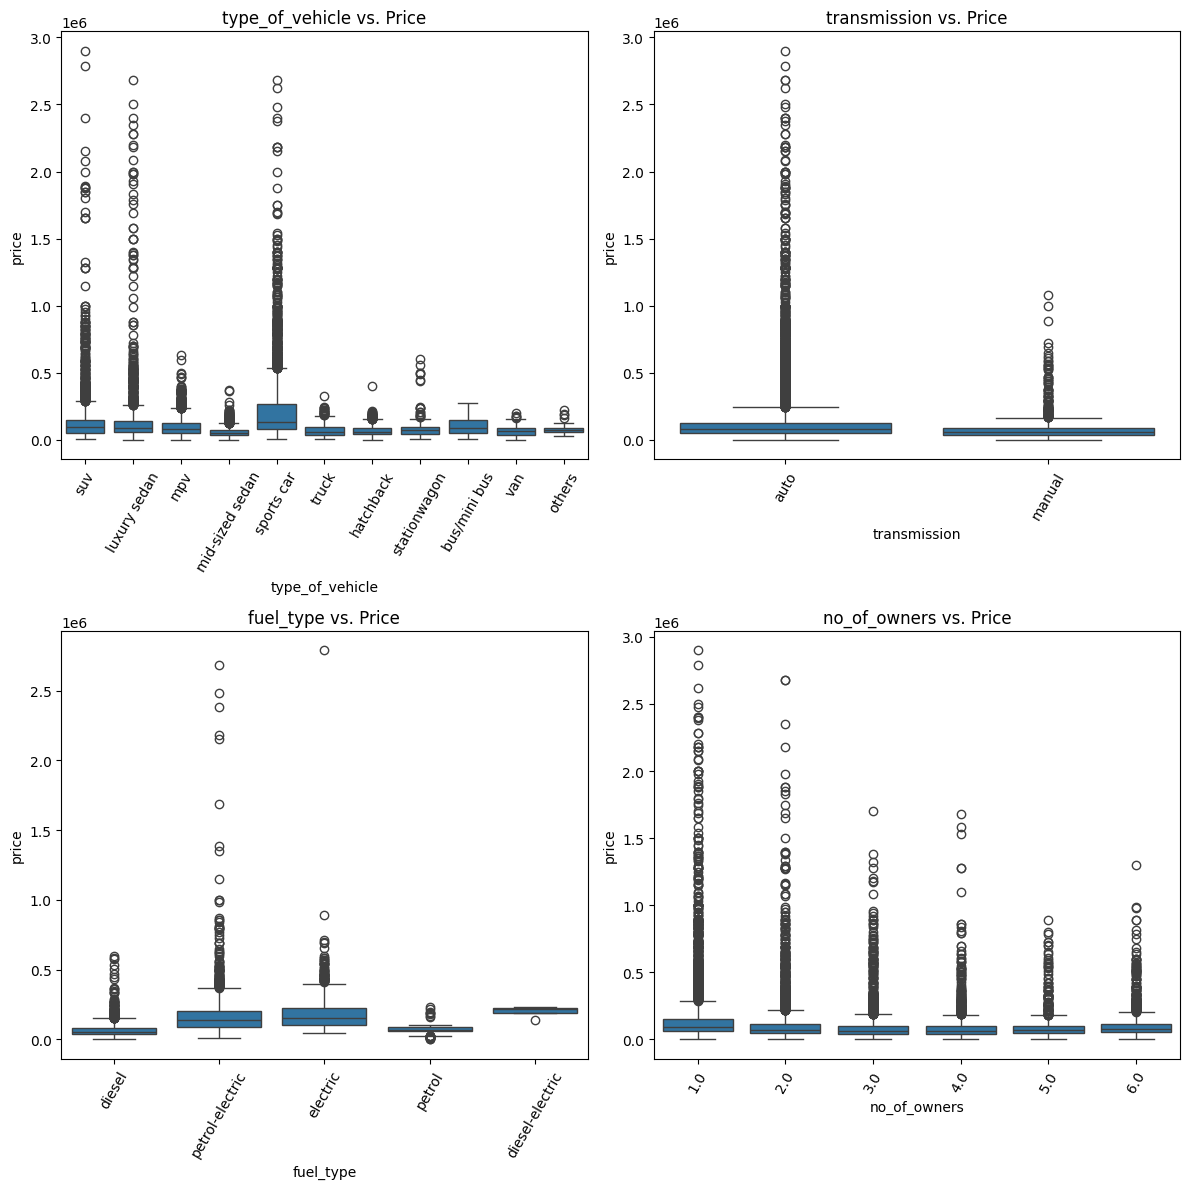

In [27]:
# Categorical Features (low-cardinal) vs Price
plt.figure(figsize=(12, 12))
for feature in low_cardinal_categorical_col:
    plt.subplot(2, 2, low_cardinal_categorical_col.index(feature) + 1)
    sns.boxplot(data=data, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
    plt.xticks(rotation=60) 
plt.tight_layout()
plt.show()

> Observation 7

We can obtain some insights.

- **Suv**, **luxury sedan** and **sports car** have higher prices and wider price ranges.
- There's a wider price range for **auto** cars, with sightly higher median prices.
- **Pertrol-electric** and **electric** cars tend to have higher prices.
- Number of owners is negatively related to price, with **1-owner** cars including most high-value vehicles.